In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b

In [2]:
df= pd.read_csv('owid-covid-data.csv')

In [3]:
df1= df[df.location=='United States']
df2= df[df.location== 'United States']
df1= df1[df1.date > '2021-01-30']
df2=df2[((df2.date > '2020-12-01') & (df2.date < '2021-1-30'))]
df2= df2[df2.date <'2021-01-01']

In [4]:
df1['date']= pd.to_datetime(df1.date)
df2['date']= pd.to_datetime(df2.date)

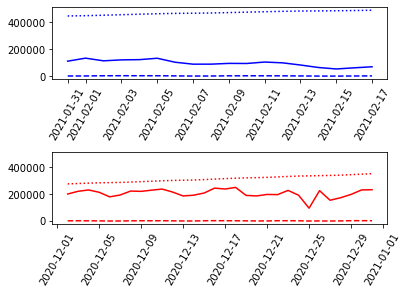

In [7]:
fig, ax= plt.subplots(2,1, sharey=True,gridspec_kw={'hspace':1.0})
ax[0].plot(df1.date, df1.new_cases, color='b')
ax[0].plot(df1.date, df1.new_deaths, color='b', linestyle='--')
ax[0].plot(df1.date, df1.total_deaths, color='b', linestyle=':')

# Plot Austin precipitation in the bottom axes
ax[1].plot(df2.date, df2.new_cases, color='r')
ax[1].plot(df2.date, df2.new_deaths, color='r', linestyle='--')
ax[1].plot(df2.date, df2.total_deaths, color='r', linestyle=':', label='total_deaths')
#plt.legend(loc='upper right')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

# Plotting time-series data


In [82]:
# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', index_col='date', parse_dates=['date'])
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


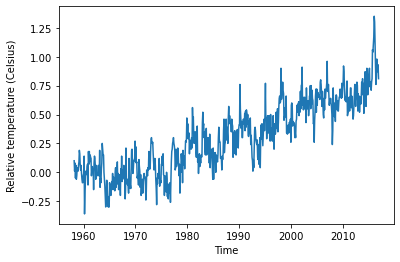

In [80]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change.relative_temp)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

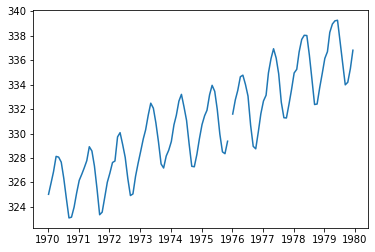

In [81]:
fig, ax= plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01' : '1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

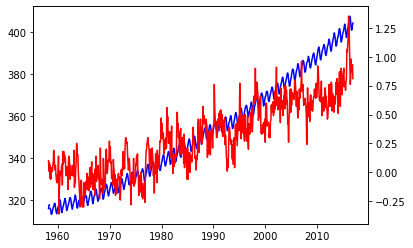

In [83]:
#SHARING XAXIS
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

plt.show()

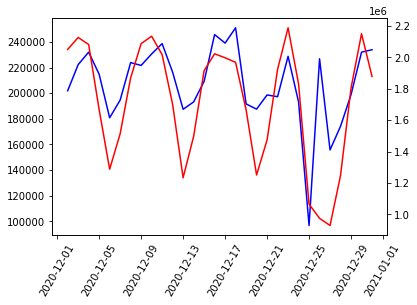

In [89]:
fig, ax = plt.subplots()
ax.plot(df2.date, df2.new_cases, color='blue')
ax1=ax.twinx()
ax1.plot(df2.date, df2.new_tests, color='r')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

In [90]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

[Text(0, 0, '2020-12-02 00:00:00'),
 Text(0, 0, '2020-12-03 00:00:00'),
 Text(0, 0, '2020-12-04 00:00:00'),
 Text(0, 0, '2020-12-05 00:00:00'),
 Text(0, 0, '2020-12-06 00:00:00'),
 Text(0, 0, '2020-12-07 00:00:00'),
 Text(0, 0, '2020-12-08 00:00:00'),
 Text(0, 0, '2020-12-09 00:00:00'),
 Text(0, 0, '2020-12-10 00:00:00')]

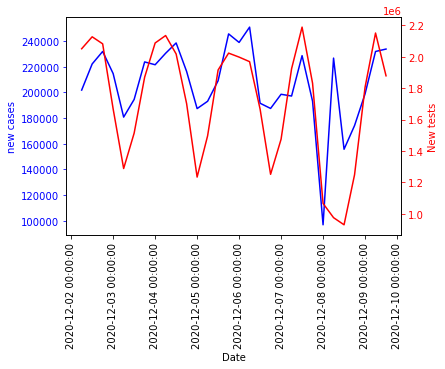

In [120]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, df2.date, df2["new_cases"], 'blue', "Date", "new cases")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, df2.date, df2['new_tests'], 'red', "Date", "New tests")
ax.set_xticklabels(df2.date, rotation=90)

# Annotating time-series data


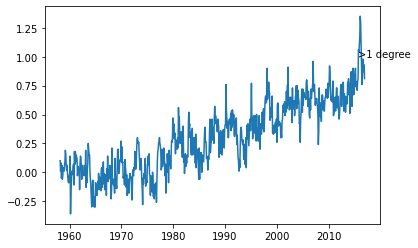

In [94]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

(array([737760., 737764., 737768., 737772., 737776., 737780., 737784.,
        737788., 737791.]),
 <a list of 9 Text major ticklabel objects>)

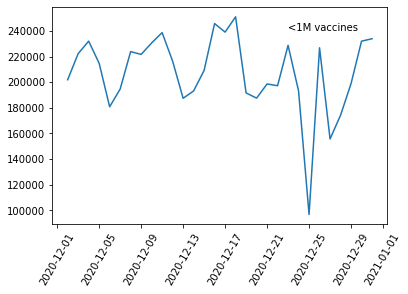

In [99]:
#create fig, ax 
fig, ax = plt.subplots()
#plot what you want
ax.plot(df2.date, df2.new_cases)
#write what you want, where on the timestampe, and where on the y axis
ax.annotate('<1M vaccines', xy=(pd.Timestamp('2020-12-23'), 240000))
plt.xticks(rotation=60)

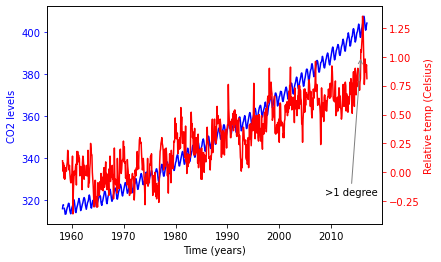

In [100]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})
plt.show()

# Quantitative comparisons: bar-charts


In [124]:
medals= pd.read_csv('medals_by_country_2016.csv')
medals
medals= medals.set_index('Unnamed: 0')
medals

,Bronze,Gold,Silver
Unnamed: 0,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4


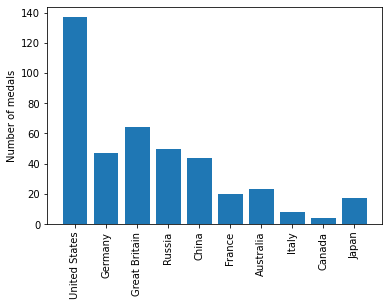

In [125]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals.Gold)

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

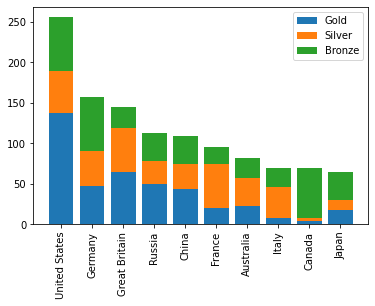

In [130]:
fig, ax= plt.subplots()
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")
ax.set_xticklabels(medals.index, rotation=90)
# Display the legend
ax.legend()
plt.show()

# Quantitative comparisons: histograms


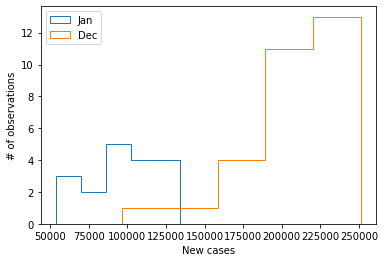

In [151]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df1.new_cases, label='Jan', histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(df2.new_cases, label='Dec', histtype='step', bins=5)

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('New cases')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

# Statsics plotting

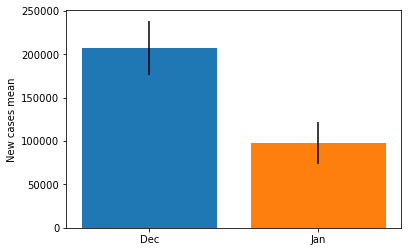

In [154]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Dec", df2.new_cases.mean(), yerr=df2.new_cases.std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Jan', df1.new_cases.mean(), yerr=df1.new_cases.std())

# Label the y-axis
ax.set_ylabel("New cases mean")

plt.show()

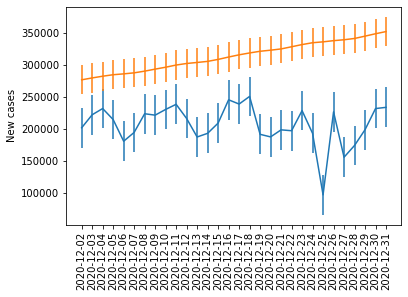

In [184]:
fig, ax = plt.subplots()

# Add the Seattle temperature data in each month with standard deviation error bars
ax.errorbar(df2.date, df2.new_cases, yerr=df2.new_cases.std())

# Add the Austin temperature data in each month with standard deviation error bars
ax.errorbar(df2.date, df2.total_deaths, yerr=df2.total_deaths.std())

# Set the y-axis label
ax.set_ylabel("New cases")
ax.set_xticklabels(df2.date, rotation=90)
plt.show()

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


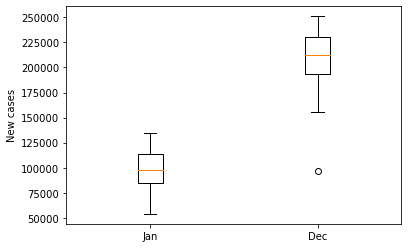

In [173]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([df1.new_cases, df2.new_cases])

# Add x-axis tick labels:
ax.set_xticklabels(['Jan', 'Dec'])

# Add a y-axis label
ax.set_ylabel('New cases')

plt.show()

# Scatter plot vis

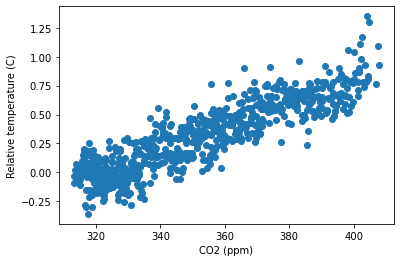

In [174]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change.co2, climate_change.relative_temp)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

[Text(0, 0, '2021-01-31'),
 Text(0, 0, '2021-02-01'),
 Text(0, 0, '2021-02-02'),
 Text(0, 0, '2021-02-03'),
 Text(0, 0, '2021-02-04'),
 Text(0, 0, '2021-02-05'),
 Text(0, 0, '2021-02-06'),
 Text(0, 0, '2021-02-07'),
 Text(0, 0, '2021-02-08'),
 Text(0, 0, '2021-02-09'),
 Text(0, 0, '2021-02-10'),
 Text(0, 0, '2021-02-11'),
 Text(0, 0, '2021-02-12'),
 Text(0, 0, '2021-02-13'),
 Text(0, 0, '2021-02-14'),
 Text(0, 0, '2021-02-15'),
 Text(0, 0, '2021-02-16'),
 Text(0, 0, '2021-02-17')]

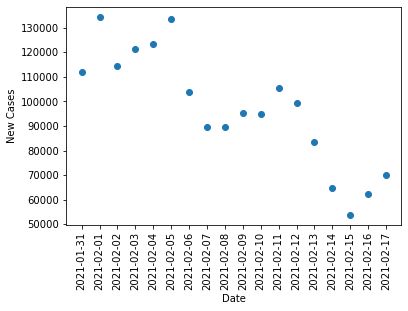

In [186]:
fig, ax= plt.subplots()
ax.scatter(df1.date, df1.new_cases)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
ax.set_xticklabels(df1.date, rotation=90)

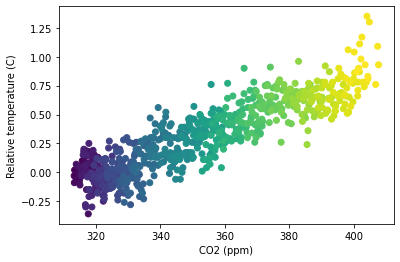

In [181]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change.co2, climate_change.relative_temp, c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

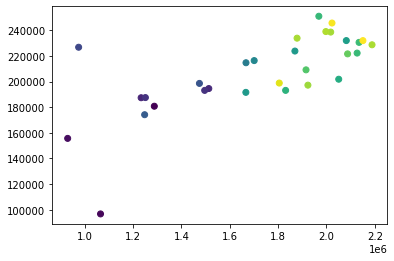

In [196]:
fig, ax=plt.subplots()
ax.scatter(df2.new_tests, df2.new_cases, c=df2.new_deaths)


# Prep your Figure

[Text(0, 0, '2020-12-02'),
 Text(0, 0, '2020-12-03'),
 Text(0, 0, '2020-12-04'),
 Text(0, 0, '2020-12-05'),
 Text(0, 0, '2020-12-06'),
 Text(0, 0, '2020-12-07'),
 Text(0, 0, '2020-12-08'),
 Text(0, 0, '2020-12-09'),
 Text(0, 0, '2020-12-10'),
 Text(0, 0, '2020-12-11'),
 Text(0, 0, '2020-12-12'),
 Text(0, 0, '2020-12-13'),
 Text(0, 0, '2020-12-14'),
 Text(0, 0, '2020-12-15'),
 Text(0, 0, '2020-12-16'),
 Text(0, 0, '2020-12-17'),
 Text(0, 0, '2020-12-18'),
 Text(0, 0, '2020-12-19'),
 Text(0, 0, '2020-12-20'),
 Text(0, 0, '2020-12-21'),
 Text(0, 0, '2020-12-22'),
 Text(0, 0, '2020-12-23'),
 Text(0, 0, '2020-12-24'),
 Text(0, 0, '2020-12-25'),
 Text(0, 0, '2020-12-26'),
 Text(0, 0, '2020-12-27'),
 Text(0, 0, '2020-12-28'),
 Text(0, 0, '2020-12-29'),
 Text(0, 0, '2020-12-30'),
 Text(0, 0, '2020-12-31')]

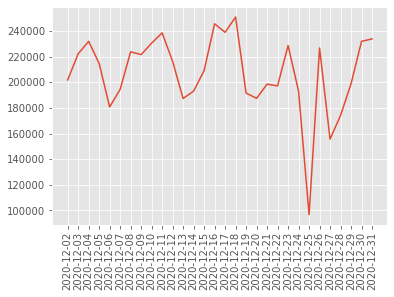

In [201]:
#use ggplot
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(df2.date, df2.new_cases)
ax.set_xticklabels(df2.date, rotation=90)

[Text(0, 0, '2020-12-02'),
 Text(0, 0, '2020-12-03'),
 Text(0, 0, '2020-12-04'),
 Text(0, 0, '2020-12-05'),
 Text(0, 0, '2020-12-06'),
 Text(0, 0, '2020-12-07'),
 Text(0, 0, '2020-12-08'),
 Text(0, 0, '2020-12-09'),
 Text(0, 0, '2020-12-10'),
 Text(0, 0, '2020-12-11'),
 Text(0, 0, '2020-12-12'),
 Text(0, 0, '2020-12-13'),
 Text(0, 0, '2020-12-14'),
 Text(0, 0, '2020-12-15'),
 Text(0, 0, '2020-12-16'),
 Text(0, 0, '2020-12-17'),
 Text(0, 0, '2020-12-18'),
 Text(0, 0, '2020-12-19'),
 Text(0, 0, '2020-12-20'),
 Text(0, 0, '2020-12-21'),
 Text(0, 0, '2020-12-22'),
 Text(0, 0, '2020-12-23'),
 Text(0, 0, '2020-12-24'),
 Text(0, 0, '2020-12-25'),
 Text(0, 0, '2020-12-26'),
 Text(0, 0, '2020-12-27'),
 Text(0, 0, '2020-12-28'),
 Text(0, 0, '2020-12-29'),
 Text(0, 0, '2020-12-30'),
 Text(0, 0, '2020-12-31')]

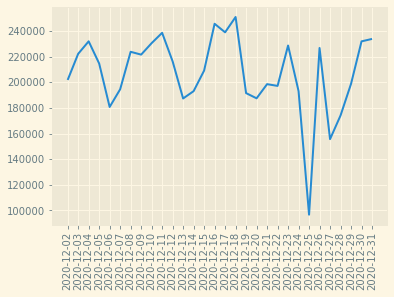

In [202]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(df2.date, df2.new_cases)
ax.set_xticklabels(df2.date, rotation=90)

# Saving

In [203]:
# Save as a PNG file
fig.savefig('my_figure_300dpi.png', dpi=300)
# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

# Automating figures from data


In [205]:
# extract silver
Silver_col = medals.Silver
#Find the unqiue
silver= Silver_col.unique()
print(silver)

[52 43 55 28 30 34 38  4 13]


[Text(0, 0, 'Bronze'), Text(0, 0, 'Gold'), Text(0, 0, 'Silver')]

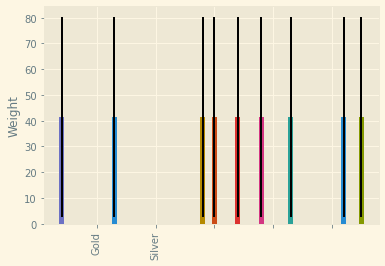

In [208]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in silver:
  # Extract the rows only for this sport
  sport_df = medals[medals["Silver"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, medals["Gold"].mean(), yerr=medals["Gold"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(medals, rotation=90)

# Save the figure to file
#fig.savefig("sports_weights.png")

# Multiple Plots

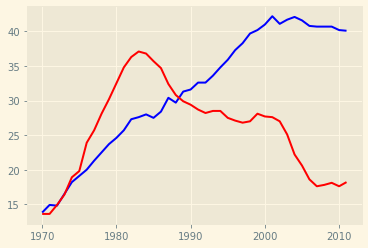

In [213]:
# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show()

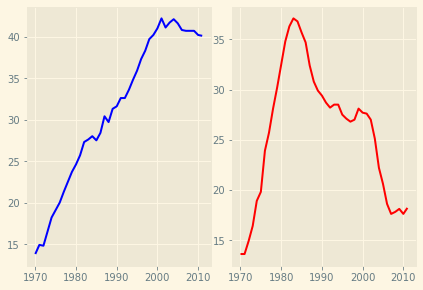

In [216]:
# Create plot axes for the first line plot
plt.axes([0.05,0.05, 0.425, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525,0.05, 0.425, 0.9])


# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

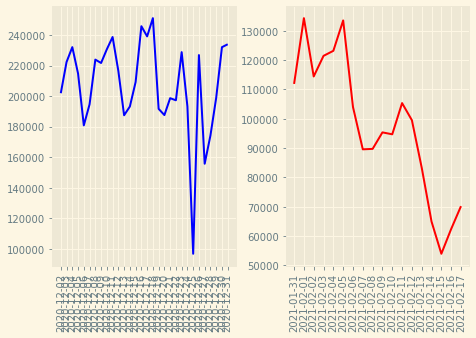

In [225]:
#Creates axes so it will not overlay
plt.axes([0.01,0.05, 0.425, 0.9])
plt.plot(df2.date, df2.new_cases, color='b')
plt.xticks(rotation=90)
#create axes for the second plot
plt.axes([0.55,0.05, 0.425, 0.9])
plt.plot(df1.date, df1.new_cases, color='r')
plt.xticks(rotation=90)

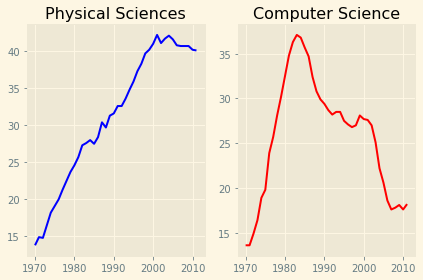

In [228]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1) 

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()


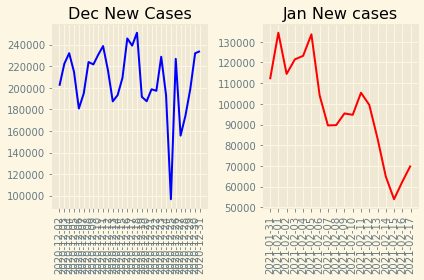

In [227]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1) 

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df2.date, df2.new_cases, color='blue')
plt.title('Dec New Cases')
plt.xticks(rotation=90)
# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(df1.date, df1.new_cases, color='red')
plt.title('Jan New cases')
plt.xticks(rotation=90)

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()


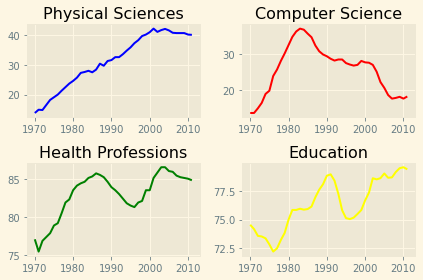

In [231]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2, 2, 1) 

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 4)

# Plot in yellow the % of degrees awarded to women in the Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


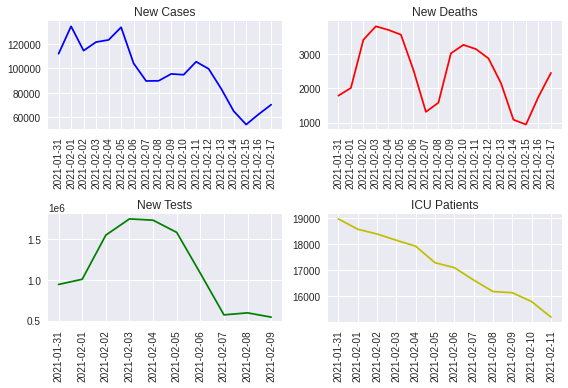

In [236]:
plt.style.use('seaborn')
plt.subplot(2,2,1)
plt.plot(df1.date, df1.new_cases, color='b')
plt.title('New Cases')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.plot(df1.date, df1.new_deaths, color='r')
plt.title('New Deaths')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.plot(df1.date, df1.new_tests, color='g')
plt.title('New Tests')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.plot(df1.date, df1.icu_patients, color='y')
plt.title('ICU Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Customizing axes


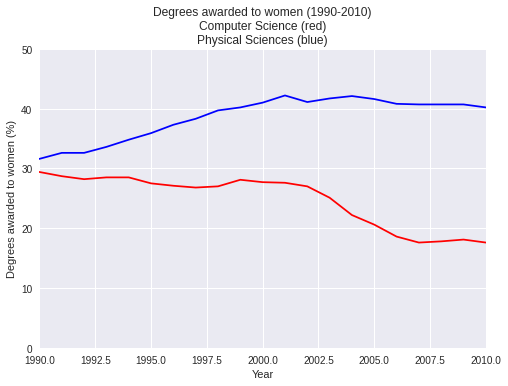

<Figure size 576x396 with 0 Axes>

In [237]:
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(1990, 2010)

# Set the y-axis range
plt.ylim(0,50)

# Add a title and display the plot
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
plt.savefig('xlim_and_ylim.png')

(200000.0, 300000.0)

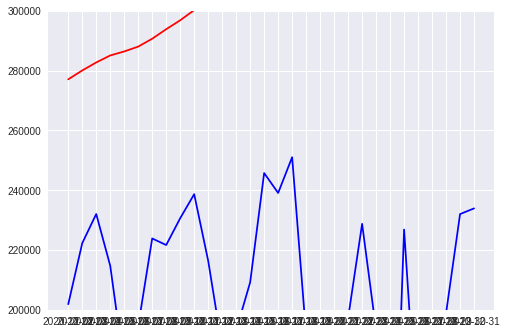

In [245]:
plt.plot(df2.date, df2.new_cases, color='b')
plt.plot(df2.date, df2.total_deaths, color='r')
plt.ylim(200000, 300000)


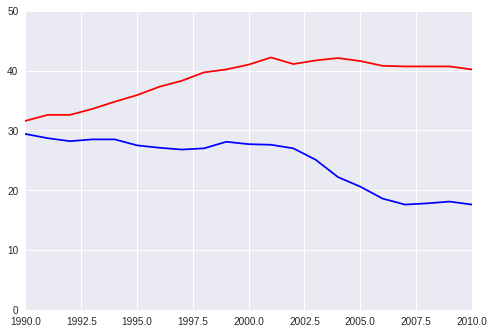

In [246]:
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits. CAN SWITCH XAXIS like this 
plt.axis([1990, 2010, 0, 50])
# Show the figure
plt.show()


# Legends, annotations, and styles


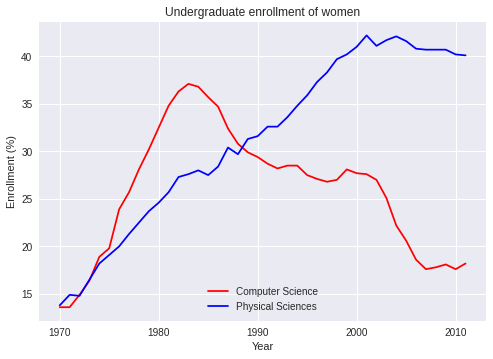

In [247]:
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()


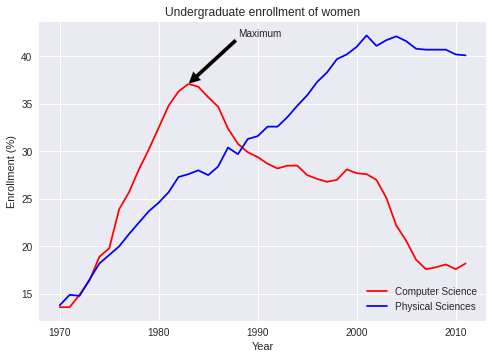

In [254]:
# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Add a black arrow annotation
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

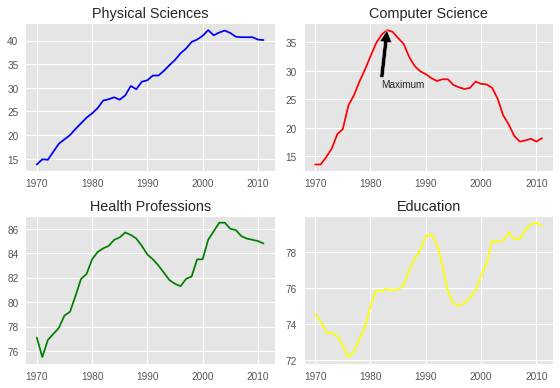

In [258]:
# Set the style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()

# Working with 2D arrays


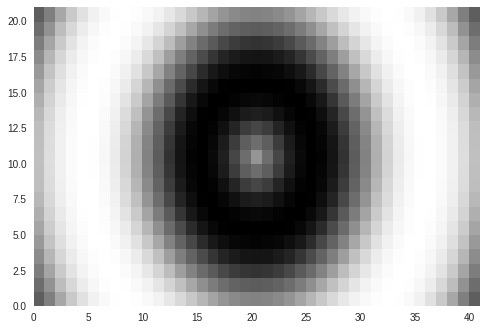

In [18]:
plt.style.use('seaborn')
# Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u, v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()


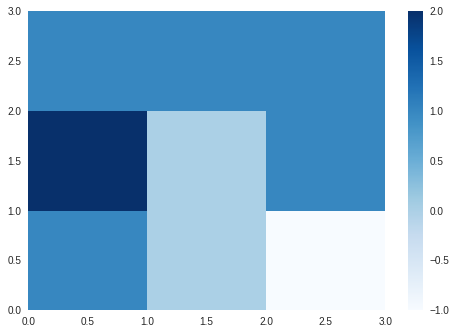

In [30]:
A = np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])
plt.pcolor(A, cmap='Blues')
plt.colorbar()
plt.show()

# Visualizing bivariate functions


(-2.0, 2.0, -1.0, 1.0)

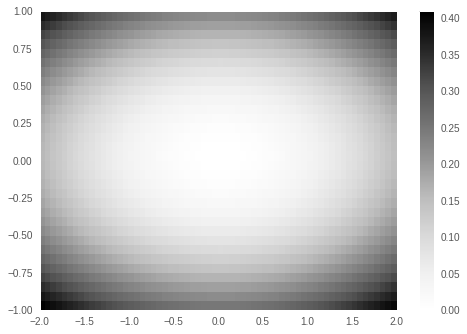

In [39]:
x= np.linspace(-2, 2 ,65)
y= np.linspace(-1,1,33)
X,Y = np.meshgrid(x, y)
Z= X**2/25 + Y**2/4
plt.pcolor(X,Y,Z)
plt.colorbar()
plt.axis('tight')

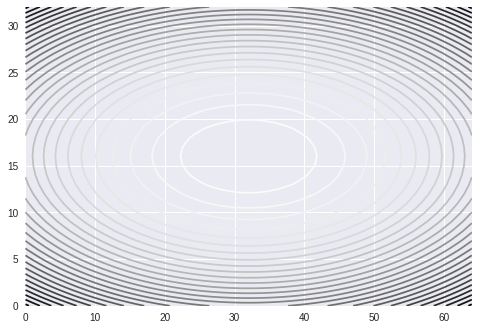

In [28]:
plt.contour(Z, 30)

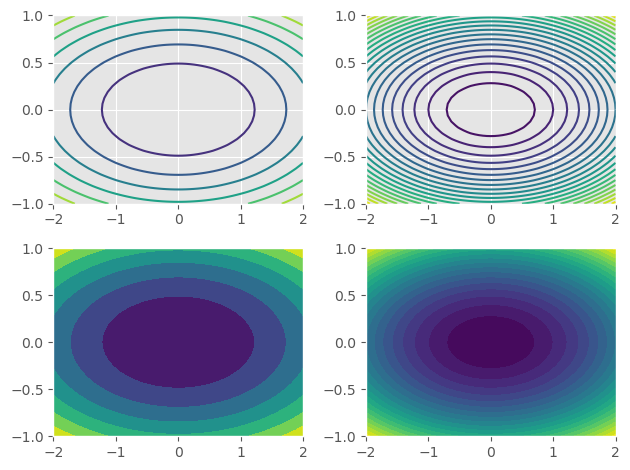

In [49]:
plt.style.use('ggplot')
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

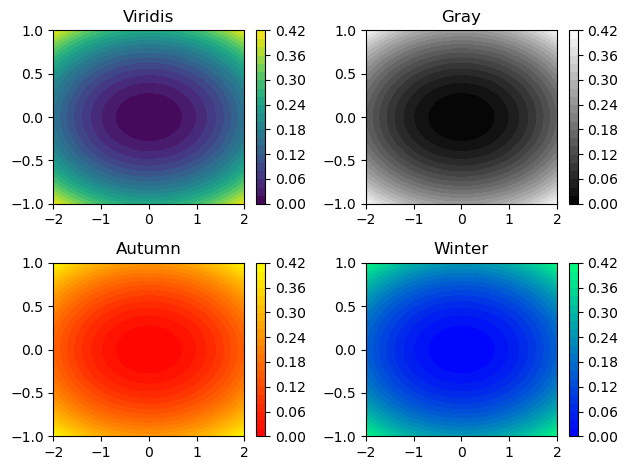

In [48]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z, 20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z, 20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


# Visualizing bivariate distributions


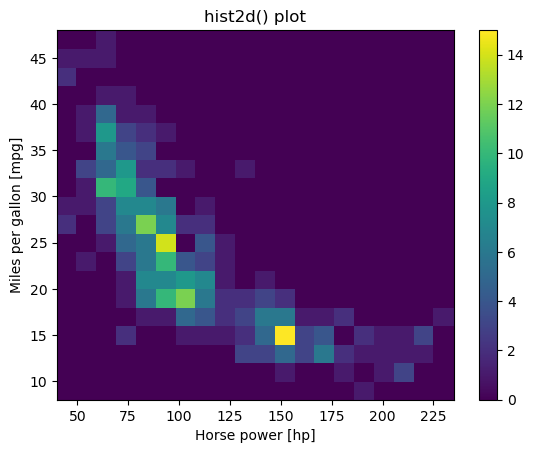

In [46]:
# Generate a 2-D histogram
plt.hist2d(hp, mpg, bins=(20,20), 
           range=((40,235), (8, 48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()


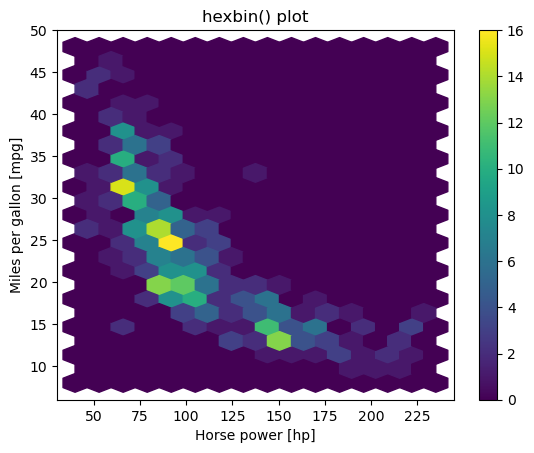

In [47]:
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15,12), 
           extent=(40,235,8,48))
           
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()


# Working with images


(3072, 3072, 3)


(-0.5, 3071.5, 3071.5, -0.5)

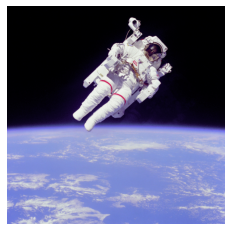

In [7]:
# Load the image into an array: img
img= plt.imread('480px-Astronaut-EVA.jpeg')

# Print the shape of the image
print(img.shape)

#plot image and remove axis
plt.imshow(img)
plt.axis('off')

(3072, 3072)


(-0.5, 3071.5, 3071.5, -0.5)

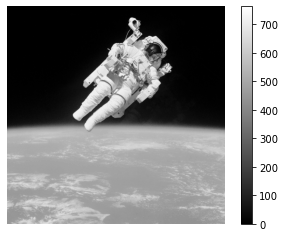

In [6]:
img = plt.imread('480px-Astronaut-EVA.jpeg')
# Compute the sum of the red, green and blue channels: intensity
intensity= img.sum(axis=2)
# Print the shape of the intensity
print(intensity.shape)
# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')
#display color bar
plt.colorbar()
# Hide the axes and show the figure
plt.axis('off')

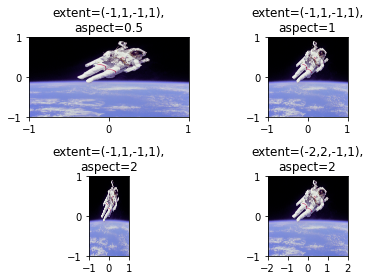

In [8]:

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

The smallest & largest pixel intensities are 104 & 230.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


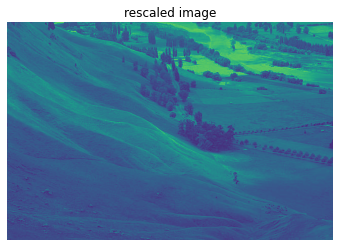

In [15]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the rescaled image
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()


# Visualizing regressions


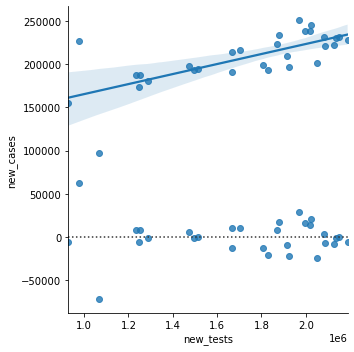

In [12]:
sns.lmplot(x='new_tests', y='new_cases', data=df2)
sns.residplot(x='new_tests', y='new_cases', data=df2)

In [5]:
auto= 'https://assets.datacamp.com/production/repositories/558/datasets/1a03987ad77b38d61fc4c692bf64454ddf345fbe/auto-mpg.csv'
auto= pd.read_csv(auto)
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


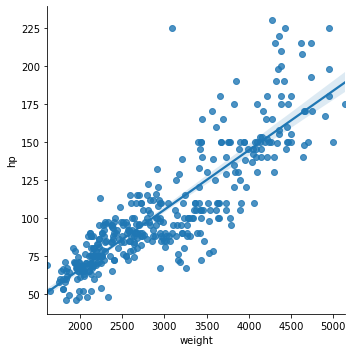

In [17]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)
# Display the plot
plt.show()


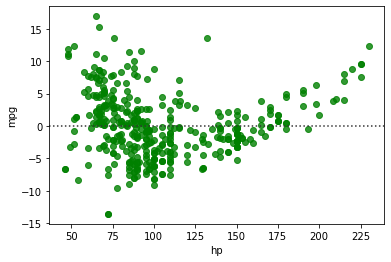

In [18]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp',y='mpg', data=auto, color='green')

# Display the plot
plt.show()

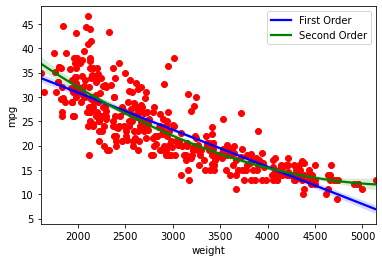

In [28]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto.weight, auto.mpg, marker='o', color='red')
# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot('weight', 'mpg', data=auto, label='First Order', scatter=None, color='blue')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot('weight', 'mpg', data=auto, label='Second Order', scatter=None, color='green', order=2)
# Add a legend and display the plot
plt.legend(loc='upper right')

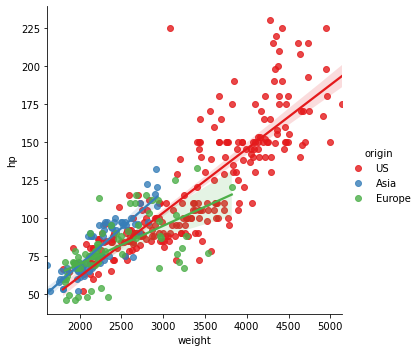

In [29]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot('weight', 'hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()


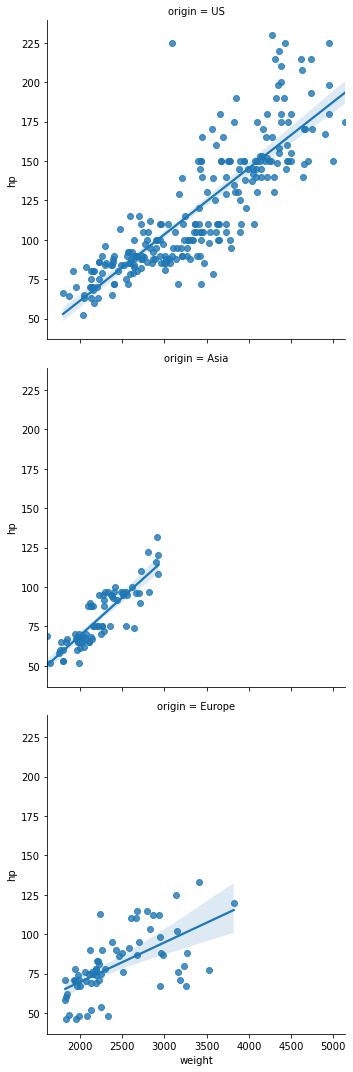

In [30]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin')

# Display the plot
plt.show()


# Visualizing univariate distributions


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

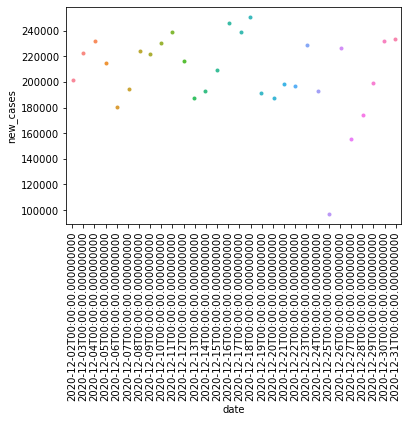

In [34]:
sns.stripplot(x='date', y='new_cases', data=df2, size=4, jitter=True)
plt.xticks(rotation=90)

In [ ]:
# an idea make a column of months look at cleaning data notebook

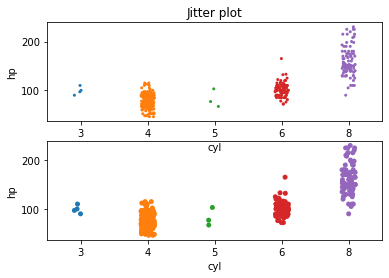

In [38]:
# Make a strip plot of 'hp' grouped by 'cyl'

plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size

plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto, size=3, jitter=True)
plt.title('Jitter plot')

# Display the plot
plt.show()

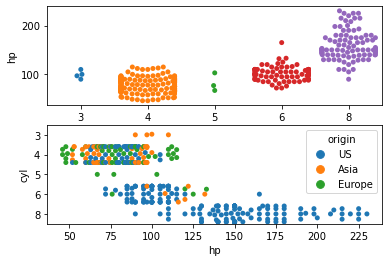

In [39]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show()


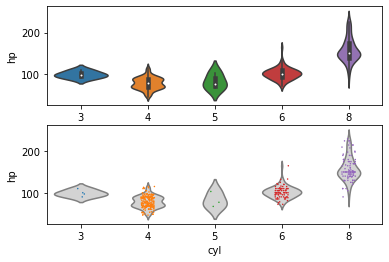

In [40]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot('cyl', 'hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot('cyl', 'hp', data=auto, size=1.5, jitter=True)

# Display the plot
plt.show()

# Visualizing multivariate distributions


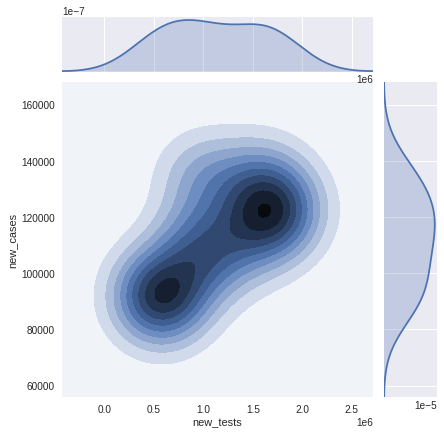

In [45]:
plt.style.use('seaborn')
sns.jointplot('new_tests', 'new_cases', df1, kind='kde')

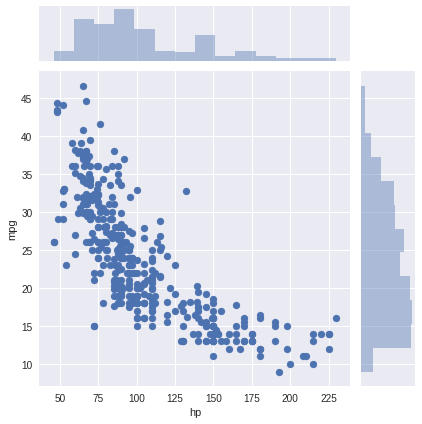

In [46]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)
plt.show()

In [47]:
#kind='scatter' uses a scatter plot of the data points
#kind='reg' uses a regression plot (default order 1)
#kind='resid' uses a residual plot
#kind='kde' uses a kernel density estimate of the joint distribution
#kind='hex'

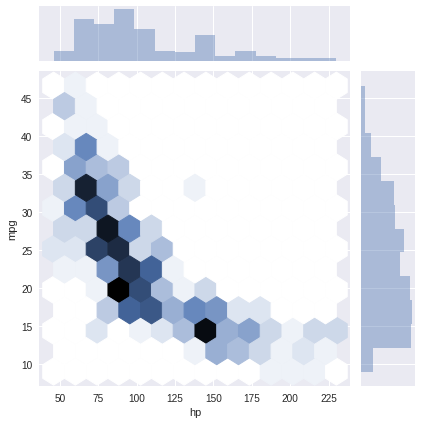

In [52]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot('hp', 'mpg', data=auto, kind='hex')

In [6]:
auto1 = auto[['mpg', 'hp', 'origin']]
auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   hp      392 non-null    int64  
 2   origin  392 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.3+ KB


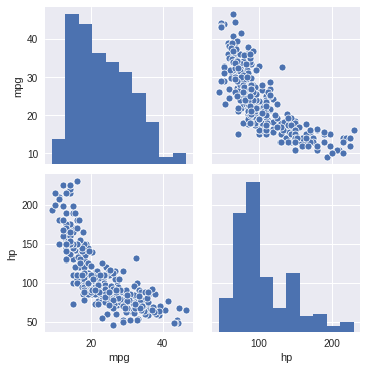

In [56]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto1)

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


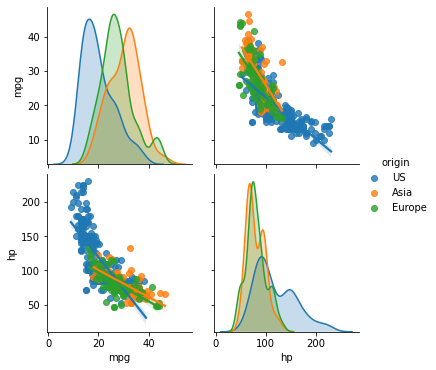

In [9]:
# Print the first 5 rows of the DataFrame
print(auto1.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto1, hue='origin', kind='reg')

# Display the plot
plt.show()


In [ ]:
#sns.heatmap for a heat map

# Visualizing time series


In [16]:
stock= 'https://assets.datacamp.com/production/repositories/558/datasets/8dd58ff003e399765cdf348305783b842ff1d7eb/stocks.csv'

In [57]:
stocks= pd.read_csv(stock)
stocks= stocks.set_index('Date')
pd.to_datetime(stocks.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Date', length=3521, freq=None)

In [64]:
aapl= stocks.AAPL
ibm= stocks.IBM
csco= stocks.CSCO
msft= stocks.MSFT

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

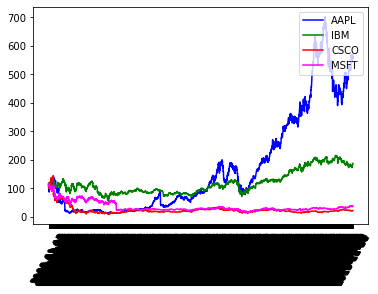

In [37]:
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')
# Plot ibm in green
plt.plot(ibm, color='green', label='IBM')
# Plot csco in red
plt.plot(csco, color='red', label='CSCO')
#Plot msf in magenta
plt.plot(msft, color='magenta', label='MSFT')
plt.legend(loc='upper right')
plt.xticks(rotation=60)

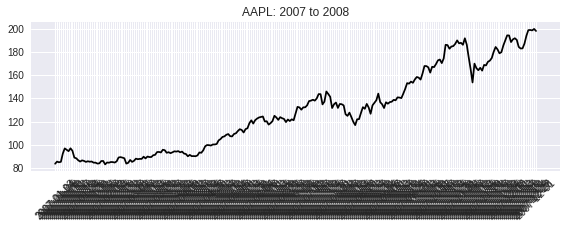

In [40]:
# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.style.use('seaborn')
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

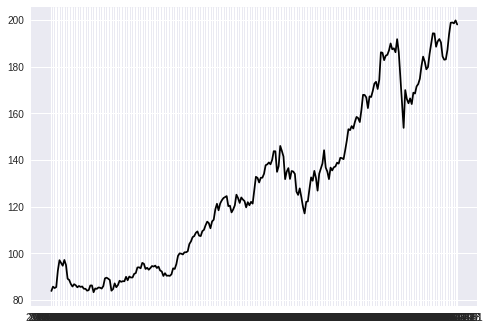

In [41]:
fig, ax= plt.subplots()
ax.plot(view, color='black')


In [44]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl['2007-11': '2008-04']
view_1

Date
2007-11-01    187.440004
2007-11-02    187.870001
2007-11-05    186.180002
2007-11-06    191.789997
2007-11-07    186.300005
                 ...    
2008-03-25    140.979996
2008-03-26    145.059996
2008-03-27    140.250006
2008-03-28    143.010002
2008-03-31    143.500000
Name: AAPL, Length: 102, dtype: float64

In [48]:
stocks1= pd.read_csv(stock, parse_dates=['Date'])

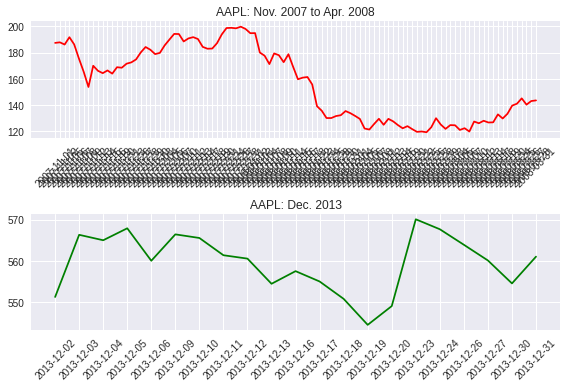

In [72]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl['2007-11':'2008-04']
#pick every 4th day
view_1f= view_1.index[::96]


# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view_1, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view_2 = aapl['2013-12':]

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: Dec. 2013')
plt.plot(view_2, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

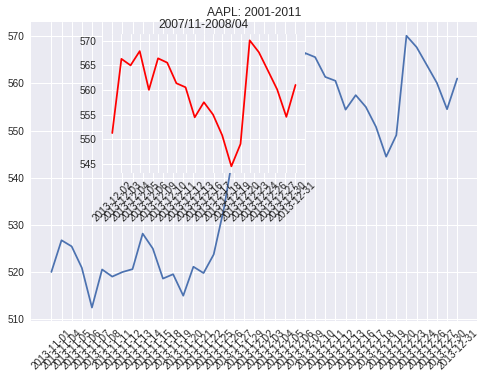

In [79]:
# Plot the entire series 
plt.plot(view_3)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view_2, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()


# Time series with moving windows


In [ ]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()


In [ ]:
# Plot std_30 in red
plt.plot(std_30, 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, 'cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, 'green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, 'magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

# Histogram equalization in images


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+01,
        1.6000e+01, 5.3000e+01, 1.4900e+02, 4.4000e+02, 1.3160e+03,
        4.1530e+03, 9.1300e+03, 2.0362e+04, 4.1592e+04, 6.1386e+04,
        5.4372e+04, 4.7989e+04, 4.3447e+04, 3.7859e+04, 2.7424e+04,
        2.0664e+04, 1.4111e+04, 9.8650e+03, 7.1910e+03, 4.9670e+03,
        3.5950e+03, 3.9170e+03, 4.0410e+03, 3.6900e+03, 4.0830e+03,
        8.4700e+02, 2.7700e+02, 1.1800e+02, 6.9000e+01, 2.6000e+01,
        1.6000e+01, 5.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  7

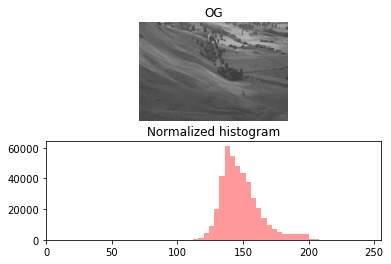

In [5]:
# Load the image into an array: image
image= plt.imread('800px-Unequalized_Hawkes_Bay_NZ.jpg')
# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('OG')
plt.axis('off')
plt.imshow(image, cmap='gray')

#flatten the image
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), color='red', alpha=0.4)


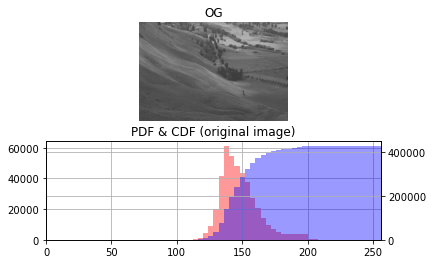

In [11]:
# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('OG')

#flatten the pixel
pixels= image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), 
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

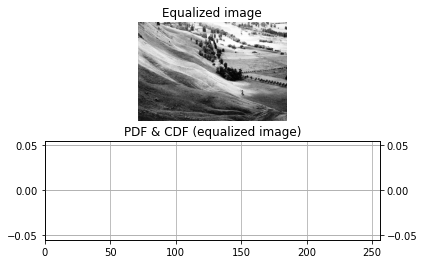

In [14]:
# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256),  cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), 
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True,
               color='blue', alpha=0.4)
plt.show()

(array([ 146.,  460., 1042., 1453., 1739., 2108., 2136., 1788., 1392.,
        1255., 1162.,  878.,  848.,  710.,  708.,  724.,  655.,  764.,
         733.,  750.,  857.,  827.,  711.,  672.,  764.,  662.,  549.,
         556.,  503.,  470.,  442.,  531.,  675.,  735.,  873., 1029.,
         944., 1014.,  847.,  664.,  533.,  553.,  476.,  398.,  334.,
         285.,  195.,  192.,  121.,  135.,  132.,  122.,  114.,  130.,
         114.,   95.,   63.,   47.,   46.,   36.,   22.,   23.,   28.,
          30.]),
 array([  0.      ,   3.984375,   7.96875 ,  11.953125,  15.9375  ,
         19.921875,  23.90625 ,  27.890625,  31.875   ,  35.859375,
         39.84375 ,  43.828125,  47.8125  ,  51.796875,  55.78125 ,
         59.765625,  63.75    ,  67.734375,  71.71875 ,  75.703125,
         79.6875  ,  83.671875,  87.65625 ,  91.640625,  95.625   ,
         99.609375, 103.59375 , 107.578125, 111.5625  , 115.546875,
        119.53125 , 123.515625, 127.5     , 131.484375, 135.46875 ,
        13

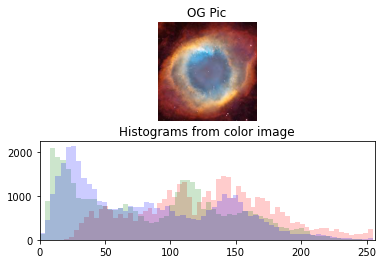

In [17]:
# Load the image into an array: image
image= plt.imread('hs-2004-32-b-small_web.jpg')
#plot 
plt.subplot(2,1,1)
plt.imshow(image)
plt.title('OG Pic')
plt.axis('off')
# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

#flatten it 
red_pixel= red.flatten()
green_pixel= green.flatten()
blue_pixel= blue.flatten()

#plot the hist
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixel, bins=64, color= 'red', alpha=0.2 )
plt.hist(green_pixel, bins=64, color='green', alpha=0.2)
plt.hist(blue_pixel, bins=64, color='blue', alpha=0.2)

(array([[  7., 102., 139., ...,   0.,   0.,   0.],
        [  7., 135., 398., ...,   0.,   0.,   0.],
        [  1.,  53., 373., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   4.,   2.,   3.],
        [  0.,   0.,   0., ...,   1.,   2.,   3.],
        [  0.,   0.,   0., ...,   4.,   4.,   1.]]),
 array([  0.     ,   7.96875,  15.9375 ,  23.90625,  31.875  ,  39.84375,
         47.8125 ,  55.78125,  63.75   ,  71.71875,  79.6875 ,  87.65625,
         95.625  , 103.59375, 111.5625 , 119.53125, 127.5    , 135.46875,
        143.4375 , 151.40625, 159.375  , 167.34375, 175.3125 , 183.28125,
        191.25   , 199.21875, 207.1875 , 215.15625, 223.125  , 231.09375,
        239.0625 , 247.03125, 255.     ]),
 array([ 15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,  67.5,  75. ,
         82.5,  90. ,  97.5, 105. , 112.5, 120. , 127.5, 135. , 142.5,
        150. , 157.5, 165. , 172.5, 180. , 187.5, 195. , 202.5, 210. ,
        217.5, 225. , 232.5, 240. , 247.5, 255. ]),
 

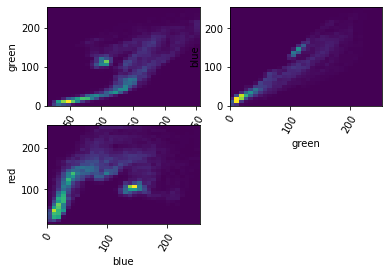

In [18]:
# Extract RGB channels and flatten into 1-D array
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Extract RGB channels and flatten into 1-D array
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))